In [147]:
##ISING MODEL
import numpy as np
#initialize grid
nx=25
ny=25
spins = 2 * np.random.randint(2, size=(nx, ny)) - 1
#Energy is the outer product of the spins on the grid, which can be either 0 or 1
#for this case (traditional) we are constraining the interactions to be nearest neighbors only
J=1
def energy(spins,J):
    E=-J*np.sum(np.roll(spins,1,axis=0)*spins+np.roll(spins,-1,axis=0)*spins+np.roll(spins,1,axis=1)*spins+np.roll(spins,-1,axis=1)*spins)
    return E
def randomflip(spins,J,nx,ny):
    previous_E=energy(spins,J)
    i1=np.random.choice(np.arange(nx))
    i2=np.random.choice(np.arange(ny))
    if spins[i1,i2]==-1:
        spins[i1,i2]=1
    else:
        spins[i1,i2]=-1
    dE=energy(spins,J)-previous_E
    return dE,spins
def metropolis(spins,J,nx,ny):
    dE,spins1=randomflip(spins,J,nx,ny)
    T=10 #K
    if dE>0:
        boltzmann=np.exp(-dE/T)
        #print(boltzmann)
        flip=np.random.choice([1,0],p=[boltzmann,1-boltzmann])
        if flip==True:
            spins=spins1
    return dE,spins
        
            

MovieWriter ffmpeg unavailable; using Pillow instead.


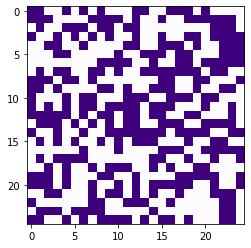

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Your existing Ising model code here (initialization, energy function, metropolis, etc.)

# Set up the plot
fig, ax = plt.subplots()
im = ax.imshow(spins, cmap='Purples', animated=True)

# Update function for animation
def update(*args):
    global spins
    dE, spins = metropolis(spins, J, nx, ny)
    im.set_array(spins)
    return im,

# Create animation
ani = FuncAnimation(fig, update, frames=1000, interval=5, blit=True)

# Show the animation
#plt.show()

# Optionally, save the animation
ani.save('ising_model_simulation.gif',dpi=300)

